In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.linear_model import Lasso
from scipy.io import loadmat
from sklearn.metrics import mean_squared_error
from scipy.integrate import solve_ivp
from numpy.fft import fft2, ifft2

# 2D Reaction-Diffusion system 

The model sort of explains the interaction between two chemical substances, there are two forces at play, one being the diffusion of the substances themselves, and the interaction between the two substances. What we see are the concentrations of such chemical compounds for each point in our space domain.

$$
\begin{align}
u_t &= 0.1\nabla^2 u + (1- u^2 + v^2)u + \beta (u^2+v^2)v,\\
v_t &= 0.1\nabla^2 v - \beta(u^2+v^2)u + (1 - u^2 - v^2) v.
\end{align}
$$

Normally you rewrite more compactly in terms of $A^2=u^2+v^2$, which gives us information about the amplitude of the waves.

$$
\begin{align}
u_t = 0.1\nabla^2 u +(1-A^2)u + \beta A^2 v,\\
v_t = 0.1\nabla^2 v - \beta A^2 u + (1 - A^2)v.
\end{align}
$$

Notice that the Laplacian defines the diffusion part of our dynamics, while the rest of the terms define the local interaction between the chemical compounds.

We want to track the evolution of $\mu$ (coupling parameter) with the EKF-SINDy scheme. So we will generate many simulations, for different coupling parameters within a range of $[0.8, 1.5]$. We will then compute the POD coordinates on such simulations, for different initial conditions (which depend on $\beta$).

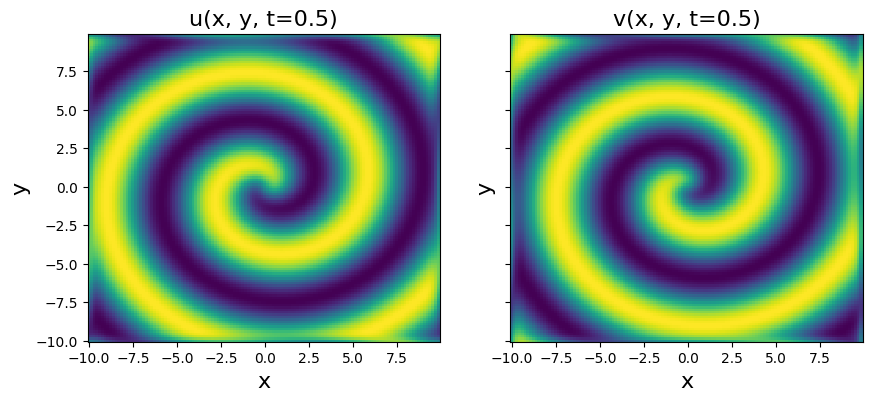

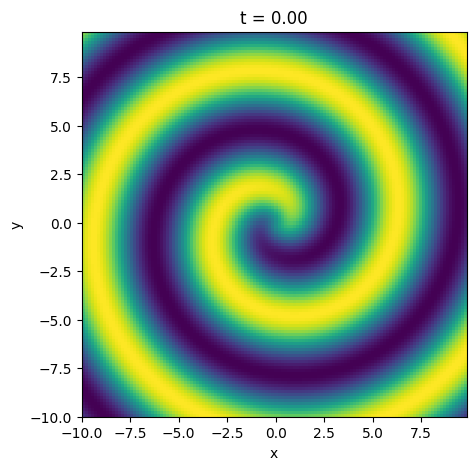